In [1]:
import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split,GridSearchCV


#For Clasification Model Built
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# For Algorithm

from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
# Read the dataset csv files and create pandas datframes

train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv", error_bad_lines=False)
print("Train and Test data sets are imported successfully")

Train and Test data sets are imported successfully


## 1. Data Analysis and Exploration

### 1.1 Explore Data

In [4]:
# Define a function to explore the train and test dataframes

def explore_data(df):
    print("-"*100)
    print("Shape of dataframe: ",df.shape)
    print("Number of records in data set",df.shape[0])
    print("Information of Dataset")
    df.info()
    print("-"*100)
    print("First 5 records of dataset:")
    return df.head(10)
    print("-"*100)


In [5]:
explore_data(train_df)

----------------------------------------------------------------------------------------------------
Shape of dataframe:  (7613, 5)
Number of records in data set 7613
Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
----------------------------------------------------------------------------------------------------
First 5 records of dataset:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
explore_data(test_df)

----------------------------------------------------------------------------------------------------
Shape of dataframe:  (3263, 4)
Number of records in data set 3263
Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
----------------------------------------------------------------------------------------------------
First 5 records of dataset:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


### 1.2 Missing Values

### 1.3 Visulaization Dataframe

### 1.4 Top Country Based on Tweet

### 1.5 Word & Text Length Count

In [7]:
# Add Two New Column Text Length and Word Count
train_df['text_length'] = train_df['text'].apply(lambda x: len(x))
train_df['word_count'] = train_df['text'].str.split().map(lambda x: len(x))
train_df.head(10)

,id,keyword,location,text,target,text_length,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,18
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,15
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,12
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,10


In [8]:
train_df.text_length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

### 1.6 Plot Based on Tweet Length

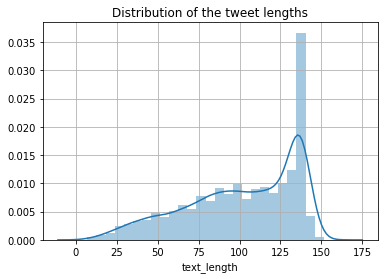

In [9]:
sns.distplot(train_df['text_length']).set_title('Distribution of the tweet lengths')
plt.grid(True)

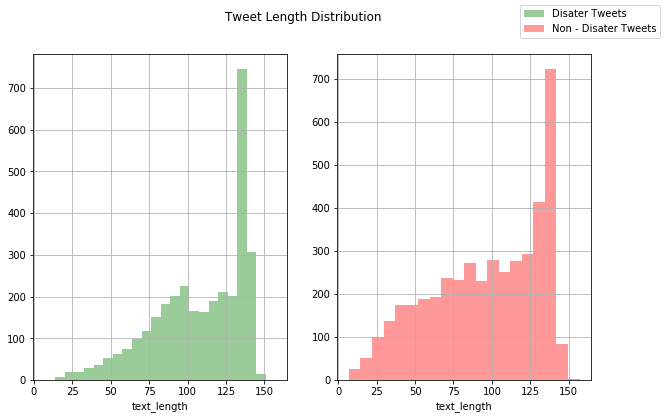

In [10]:
# Make Two Plot For Disater & Not-Disater Tweet Based on Text Length

f, (ax1, ax2) = plt.subplots(1,2, sharex=True,figsize=(10,6))
sns.distplot(train_df[(train_df['target'] == 1)]['text_length'], ax=ax1, kde=False, color='green',label='Disater Tweets')
sns.distplot(train_df[(train_df['target'] == 0)]['text_length'], ax = ax2, kde=False, color = 'red', label ='Non - Disater Tweets')
f.suptitle('Tweet Length Distribution')
f.legend()
ax1.grid()
ax2.grid()
plt.show()

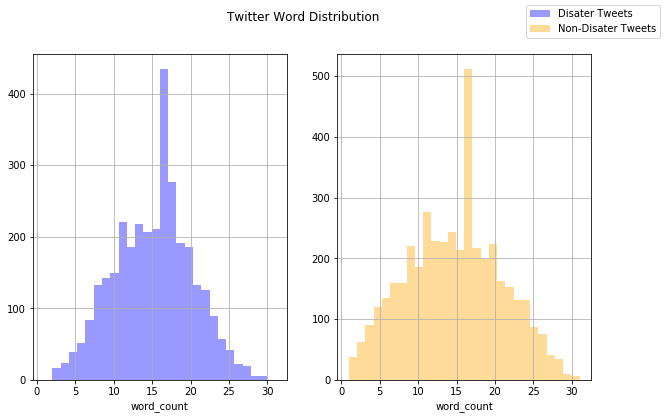

In [11]:
f, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,6))
sns.distplot(train_df[(train_df['target'] == 1)]['word_count'],ax=ax1, kde=False,color="blue",label='Disater Tweets')
sns.distplot(train_df[(train_df['target'] == 0)]['word_count'],ax=ax2, kde=False,color="orange",label='Non-Disater Tweets')
f.suptitle('Twitter Word Distribution')
f.legend()
ax1.grid()
ax2.grid()
plt.show()

In [12]:
# train_df[train_df['target']==1]['text'][10:20]
# train_df[train_df['target']==0]['text'][10:20]

## 2. Data Pre-processing

### 2.1 Data Normalization
- Removing URL
- Removing all irrelevant characters (Numbers and Punctuation)
- Convert all characters into lowercase

In [13]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
train_df1=train_df.copy()
test_df1=test_df.copy()


train_df1['text'] = train_df1['text'].apply(lambda x: clean_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: clean_text(x))

In [15]:
def text_after_preprocess(before_text,after_text):
    print("-"*50)
    print("Before Clean Text")
    print("-"*50)
    print(before_text.head(10))
    print("-"*50)
    print("After Clean Text")
    print("-"*50)
    print(after_text.head(10))
    

In [16]:
# text_after_preprocess(test_df['text'],test_df1['text'])
# text_after_preprocess(train_df['text'],train_df1['text'])

### 2.2 Tokenization

In [17]:
# Lets Tokenize the training and the test dataset copies with RegEx tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_df1['text'] = train_df1['text'].apply(lambda x: tokenizer.tokenize(x))
test_df1['text'] = test_df1['text'].apply(lambda x: tokenizer.tokenize(x))

In [18]:
# train_df1['text'].head(5)
# test_df1['text'].head(5)

### 2.3 Remove Stopwords

In [19]:
# Remove Stop Words Function
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [20]:
train_df1['text'] = train_df1['text'].apply(lambda x: remove_stopwords(x))
test_df1['text'] = test_df1['text'].apply(lambda x: remove_stopwords(x))

In [21]:
# train_df1['text'].head(5)
# test_df1['text'].head(5)

### 2.4 Convert the list of tokens into back to the string

In [22]:
def combine_text(text):
    all_text = ' '.join(text)
    return all_text

In [23]:
train_df1['text'] = train_df1['text'].apply(lambda x: combine_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: combine_text(x))

In [24]:
# test_df1['text'].head(5)
# train_df1['text'].head(5)

### 2.5 Lemmatization

In [25]:
def stem_lem(text):
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemm_text =  " ".join(lemmatizer.lemmatize(token) for token in tokens)
    return lemm_text


In [26]:
train_df1['text'] = train_df1['text'].apply(lambda x: stem_lem(x))
test_df1['text'] = test_df1['text'].apply(lambda x: stem_lem(x))

In [27]:
#train_df1['text'].head(10)
test_df1['text'].head(10)

test_df1.to_csv("Clean_Harvey_missing_ids_50K.csv",index=False)

### 2.6 Word Cloud

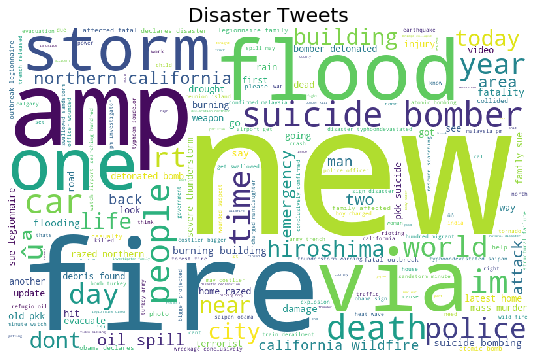

In [28]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',width=800,height=500).generate(" ".join(train_df1[(train_df1['target'] == 1)]['text']))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Disaster Tweets',fontsize=20);


## 3. Vectorization of text

In [29]:
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer()
train_cv = count_vectorizer.fit_transform(train_df1['text'])
test_cv = count_vectorizer.transform(test_df1["text"])


In [30]:
# Vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tf = tfidf.fit_transform(train_df1['text'])
test_tf = tfidf.transform(test_df1["text"])

## 4. Built a Text Classification Model

### Model List For Classifire

In [57]:
 models = [LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)]

# models = [LogisticRegression(C=1.0),SVC(),MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5),RandomForestClassifier()]

#models = [LogisticRegression(random_state=0),LogisticRegression(C=1.0),svm.SVC(),LogisticRegression(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced'),KNeighborsClassifier(),SVC(class_weight='balanced'), GradientBoostingClassifier(),RandomForestClassifier(),RidgeClassifier(class_weight='balanced'),AdaBoostClassifier(n_estimators=100),MultinomialNB(),Perceptron(class_weight='balanced'),XGBClassifier(n_estimators=300),CatBoostClassifier(verbose=0),KMeans()]


### 4.1 For CountVetorizer

In [58]:
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(train_cv, train_df.target, test_size=0.2, random_state=2020)

In [59]:

data_compaire_cv = []
df_compaire_cv = pd.DataFrame(data_compaire_cv, columns = ['Classifier', 'F1-Score', 'Accuracy']) 


In [68]:
def fit_and_predict_cv(count,model,x_train,y_train,x_test,y_test):
    
    clf = model
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)

    # Confusion Matrix
    print('Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    print('-'*100)

    # Classification Report
    print('Classification Report')
    print(classification_report(y_test,predictions))
    print('-'*100)

    # Model
    print("{}".format(model))
    print('-'*100)

    # Training Set Accuracy
    print('Accuracy of classifier on training set: ',round(clf.score(x_train,y_train)*100))
    print('-'*100)

    # Test Set Accuracy
    print('Accuracy of classifier on test set: ',round(accuracy_score(y_test,predictions) * 100))
    print('-'*100)

    # F1 Score 
    print('F1 of classifier on test set: ', round(f1_score(y_test,predictions,average='weighted'),2))

    # Insert Algorithm Analysis Value Into a Data Frame
    temp1 = f1_score(y_test,predictions,average='weighted')
    temp2 = round(accuracy_score(y_test,predictions) * 100)
    df_compaire_cv.loc[count] = [model,temp1,temp2]

    print('#'*100)
    

In [69]:
# Execute Function
count = 0
for model in models:
    count +=1
    fit_and_predict_cv(count,model,x_train_cv,y_train_cv,x_test_cv,y_test_cv)


Confusion Matrix
[[736 113]
 [195 479]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       849
           1       0.81      0.71      0.76       674

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

----------------------------------------------------------------------------------------------------
LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
----------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### 4.2 For TFIDF Vectorizer

In [62]:
#Split TFDIF vectorize data

x_train_tf,x_test_tf,y_train_tf,y_test_tf = train_test_split(train_tf,train_df.target,test_size=0.2,random_state=2020)

In [63]:
data_compaire_tf = []
df_compaire_tf = pd.DataFrame(data_compaire_tf, columns = ['Classifier', 'F1-Score', 'Accuracy'])

In [64]:
def fit_and_predict_tf(count,model,x_train,y_train,x_test,y_test):
    
    clf = model
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    
    # Confusion Matrix
    print('Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    print('-'*100)

    # Classification Report
    print('Classification Report')
    print(classification_report(y_test,predictions))
    print('-'*100)

    # Model
    print("{}".format(model))
    print('-'*100)

    # Training Set Accuracy
    print('Accuracy of classifier on training set: ',clf.score(x_train,y_train))
    print('-'*100)

    # Test Set Accuracy
    print('Accuracy of classifier on test set: ',round(accuracy_score(y_test,predictions) * 100))
    print('*'*100)

    # F1 Score 
    print('F1 of classifier on test set: ', round(f1_score(y_test,predictions,average='weighted'),2))

    # Insert Algorithm Analysis Value Into a Data Frame
    temp1 = f1_score(y_test,predictions,average='weighted')
    temp2 = '{} %'.format(round(accuracy_score(y_test,predictions) * 100))
    df_compaire_tf.loc[count] = [model,temp1,temp2]

    print('#'*100)

In [65]:
# Execute Function
count = 0
for model in models:
    count +=1
    fit_and_predict_tf(count,model,x_train_tf,y_train_tf,x_test_tf,y_test_tf)

Confusion Matrix
[[758  91]
 [213 461]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       849
           1       0.84      0.68      0.75       674

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

----------------------------------------------------------------------------------------------------
LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
----------------------------------------------------------------------

In [66]:
df_compaire_tf.sort_values(by=['F1-Score'],ascending=False)

,Classifier,F1-Score,Accuracy
1,"LogisticRegression(C=1.623776739188721, class_...",0.797153,80.0 %


In [67]:
df_compaire_cv.sort_values(by=['F1-Score'],ascending=False)

,Classifier,F1-Score,Accuracy
1,"LogisticRegression(C=1.623776739188721, class_...",0.795876,80.0


## 5. Best Classifire

In [56]:
# After all classifires test LogisticRegression() with TfidfVectorizer work best

clf_logreg = LogisticRegression(C=1.0,penalty = 'l2',solver='lbfgs')
clf_logreg.fit(x_train_tf, y_train_tf)
prediction = clf_logreg.predict(x_test_tf)
confusion_matrix(y_test_tf,prediction)
print(classification_report(y_test_tf,prediction))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       849
           1       0.85      0.66      0.74       674

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [43]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_tf, y_train_tf)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.795840 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.759934 (0.014950) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.760044 (0.014667) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.759989 (0.014894) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.782047 (0.013427) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.782047 (0.013427) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.781992 (0.013371) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.795785 (0.013936) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.795840 (0.013916) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.795731 (0.013918) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.692666 (0.011666) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.692666 (0.011666) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.693706 (0.011382) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.573563 (0.000752) with: {

In [55]:
clf_logreg

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

## Submission File

In [45]:
predict_tf = []
predict_tf = pd.DataFrame(data_compaire_tf, columns = ['ID', 'target'])

In [46]:
def submission(file_loc,model,text_vector):
    
    sub_df = pd.read_csv(file_loc)
    sub_df['target'] = model.predict(text_vector)
    sub_df.to_csv("Predict_Clean_Harvey_missing_ids_50K.csv",index=False)


In [47]:
file_loc = 'Clean_Harvey_missing_ids_50K.csv'
test_vector = test_tf
submission(file_loc,clf_logreg,test_vector)

In [48]:
# print(predict_tf)

In [49]:
# predict_tf.to_csv('predict_beirut_dsct_.csv', index=False)

In [50]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(x_train_tf,y_train_tf)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1293 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 1868 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 2566 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 3324 tasks      | elapsed: 68.5min
[Parallel(n_jobs=-1)]: Done 4174 tasks      | elapsed: 123.3min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 244.8min finished


In [51]:
best_clf.best_estimator_


LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
print (f'Accuracy - : {best_clf.score(x_train_tf,y_train_tf):.3f}')

Accuracy - : 0.901
